## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# reading in data and veiwing the first 5 rows
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [4]:
# checking to see the number of rows in the data set
df.shape

(294478, 5)

## there are 294478 rows and 5 columns

c. The number of unique users in the dataset.

In [6]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

## the number of unique users is the number of unique 'user_id" = 290584 

d. The proportion of users converted.

In [9]:
# the proportion of users converted is the number of converted divided by the nuber of total users
len(df.query('converted == 1'))/df['user_id'].nunique()

0.12126269856564711

## the proportions of user converter is 0.12126

e. The number of times the `new_page` and `treatment` don't line up.

In [23]:
len(df[(df['group']== 'treatment')&(df['landing_page'] != 'new_page')])

1965

##   The number of times the new_page and treatment don't line up is 1965

In [25]:
len(df[(df['group']== 'control')&(df['landing_page'] != 'old_page')])

1928

##   The number of times the old_page and control don't line up is 1928

f. Do any of the rows have missing values?

In [26]:
#checking for null values
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

## non of the rows have msissing values

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [49]:
#creating two data frames of the desired result we want
treat=df[(df['group']== 'treatment')&(df['landing_page'] == 'new_page')]
con=  df[(df['group']== 'control')&(df['landing_page'] == 'old_page')]

In [55]:
# i concatenated the two datafram and reset the index to read the correct value using ignore_index=True
df2=pd.concat([treat,con],ignore_index=True)

In [56]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [58]:
df2.shape

(290585, 5)

In [53]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [66]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

## the number of unique users is the number of unique 'user_id" = 290584 

b. There is one **user_id** repeated in **df2**.  What is it?

In [72]:
df2[df2.duplicated(['user_id'])]

,user_id,timestamp,group,landing_page,converted
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


##  The user_id that was repeated is 773192

c. What is the row information for the repeat **user_id**? 

In [72]:
df2[df2.duplicated(['user_id'])]

,user_id,timestamp,group,landing_page,converted
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [77]:
dup=df2[df2.duplicated(['user_id'])]
dup['user_id']

1404    773192
Name: user_id, dtype: int64

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [81]:
# droping the duplicated user_id row 
df2.drop(index=1404,axis=0,inplace=True)
df2.nunique()

user_id         290584
timestamp       290584
group                2
landing_page         2
converted            2
dtype: int64

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [82]:
len(df2.query('converted == 1'))/df2.shape[0]

0.11959708724499628

## the probability of an individual converting regardless of the page they received  is 0.1196

b. Given that an individual was in the `control` group, what is the probability they converted?

In [83]:
len(df2[(df2['group']=='control')&(df2['converted']== 1)])/len(df2.query("group == 'control'"))

0.1203863045004612

## Given that an individual was in the control group, the probability they converted is 0.1204

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [84]:
len(df2[(df2['group']=='treatment')&(df2['converted']== 1)])/len(df2.query("group == 'treatment'"))

0.11880806551510564

## Given that an individual was in the treatment group,the probability they converted is 0.1188

d. What is the probability that an individual received the new page?

In [85]:
len(df2.query("group == 'treatment'"))/df2.shape[0]

0.5000619442226688

## the probability that an individual received the new page is 0.5000

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Your answer goes here.**

## considering the probabilities of conversion from the old control page being 12.03% and the new treatment page being approximately  12% , there is no evidence that shows from the probabilities that the  new treatment page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

                                 H0   : P_new <= P_old
                                 H1   : P_new >  P_old

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

                                   H0   : P_new  =  P_old
                                   H1   : P_new !=  P_old 

a. What is the **convert rate** for $p_{new}$ under the null? 

In [112]:
# the probability of 
p_new=len(df2.query('converted == 1'))/df2.shape[0]
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [114]:
# Because pnew and p old are equall, therefore
p_old = p_new
p_old

0.11959708724499628

c. What is $n_{new}$?

In [116]:
# this is the number of rows  for  the treatment page
n_new = len(df2.query("group =='treatment'"))
n_new

145310

d. What is $n_{old}$?

In [117]:
# this is the number of rows  for  the control page
n_old = len(df2.query("group =='control'"))
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [125]:
# simulating 145310 choices where the probabily of a 1 is p_new
new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, 1-p_new])
# displayin the value
new_page_converted

array([0, 0, 0, ..., 1, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [126]:
# simulating 145274 choices where the probabily of a 1 is p_new
old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, 1-p_old])
# displayin the value
old_page_converted

array([1, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [127]:
# p_new will be the mean of new_page_converted and p_old will be the mean of old_page_converted
new_page_converted.mean()-old_page_converted.mean()

-0.0019223206944908727

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [128]:
# sumulating the value of (p_new - p_old ) 10,000 times
p_diffs = []
for x in range(10000):
    new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, 1-p_new]).mean()
    old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, 1-p_old]).mean()
    p_diffs.append(new_page_converted -old_page_converted )
    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

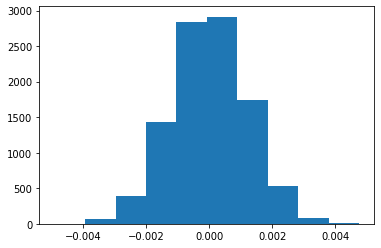

In [130]:
# plotting the histogram
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [134]:
# we nee to find the actuall difference for the ab_data.csv
act_diff = len(df2[(df2['group']=='treatment')&(df2['converted']== 1)])/len(df2.query("group == 'treatment'"))-len(df2[(df2['group']=='control')&(df2['converted']== 1)])/len(df2.query("group == 'control'"))
act_diff
# proportion of p_diffs > act_diff
p_diffs = np.array(p_diffs)
p_val =(p_diffs > act_diff).mean()
p_val

0.9088

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

## what we computed in part j was a value know as the P_Value, which we calculated by testing our alternative Hypotessis H1 with the probabilities of the difference in control and treatment group  of the bootstrapped sample and the original  data  ab_data.csv, when compared with the type 1 error threshold it helps us detemine which hypotessis is tue or false.from the p_value bieng 0.9088 which is greater than the type 1 threshold of 0.05, we will stay with the null hypotesis which states that the  old page converts more than or is equall to the number converted by the newpage

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [135]:
import statsmodels.api as sm

# numner of old pages that converted
convert_old = len(df2[(df2['group']=='control')&(df2['converted']== 1)])
# numner of new pages that converted
convert_new = len(df2[(df2['group']=='treatment')&(df2['converted']== 1)])
# total number of all the old page views 
n_old = len(df2.query("group =='control'"))
# total number of all the new page views
n_new = len(df2.query("group =='treatment'"))

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [145]:
# creating an array as inputs for the stats .proportions_ztest  

#array for converted 
converted = np.array([convert_old ,convert_new])
# array for the total number of rows for both control aand treatment
total = np.array([n_old,n_new])
#using stats.proportions_ztest to get the z score and p-value
z_score, p_val = sm.stats.proportions_ztest(count=converted,nobs=total,alternative='larger')
z_score, p_val

(1.3109241984234394, 0.09494168724097551)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

## the p values still shows a value greater than 0.05 which means we stay with the null, the z score value falls within the acceptable value of -1.96 to 1.96

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

Logistic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [167]:
dt= df2.copy()
dt.head()

,user_id,timestamp,group,landing_page,converted
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [169]:
# Creating the dummy variable and droping landing_page and the old_page
dt[['ab_page','old_page']]= pd.get_dummies(dt['landing_page'])
dt.drop(['landing_page','old_page'],axis =1,inplace  = True)

In [171]:
# creating our intecept colomn
dt['intercept']= 1

In [172]:
dt.head()

,user_id,timestamp,group,converted,ab_page,intercept
0,661590,2017-01-11 16:55:06.154213,treatment,0,1,1
1,853541,2017-01-08 18:28:03.143765,treatment,0,1,1
2,679687,2017-01-19 03:26:46.940749,treatment,1,1,1
3,817355,2017-01-04 17:58:08.979471,treatment,1,1,1
4,839785,2017-01-15 18:11:06.610965,treatment,1,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [176]:
# fitting the model
import statsmodels.api as sm
logit_mod = sm.Logit(dt['converted'],dt[['intercept','ab_page']])
results= logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [177]:
# displaying the sumary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 03 May 2020   Pseudo R-squ.:               8.077e-06
Time:                        13:21:57   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [178]:
np.exp(-0.0150)

0.9851119396030626

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Put your answer here.**

 the p-value associated with ab_page is 0.190, It differs from the value I found in the Part II because they have different hypothesises
 for each view of the treatment page , it is 0.99 times likely to lead to a conversion holding all else constant
 
 
 the null and alternative hypotheses in the Part II?
 
                                    H0   : P_new <= P_old
                                    H1   : P_new >  P_old
 
 the null and alternative hypotheses associated with the regression model is
 
                                   H0   : P_new  =  P_old
                                   H1   : P_new !=  P_old 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Its is good to consider  other factors to add into a regression model so  as to have a concrete proof that one would be making the right conclusion abouth the data

The disadvantages to adding  additional terms into a regression model is listed below
 1) multicollinearity
 2) outliers
 3) non- constant variables

**Put your answer here.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [179]:
# loading the data with pandas
countries_df = pd.read_csv('countries.csv')

# merging the data frames 
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [180]:
#viewing the data fram first 5 rows
df_new.head()

,country,timestamp,group,landing_page,converted
user_id,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0


In [182]:
# Checking to see the  unique variables  in the country column
df_new['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [183]:
# Creating the dummy variable
df_new[['ca','uk','us']] =pd.get_dummies(df_new['country'])
df_new[['ab_page','old_page']]= pd.get_dummies(df_new['landing_page'])

# dRopping unwanted columns
df_new.drop(['landing_page','old_page','country'],axis =1,inplace  = True)

# viewing the new datafram
df_new.head()

,timestamp,group,converted,ca,uk,us,ab_page
user_id,,,,,,,
834778,2017-01-14 23:08:43.304998,control,0,0,1,0,0
928468,2017-01-23 14:44:16.387854,treatment,0,0,0,1,1
822059,2017-01-16 14:04:14.719771,treatment,1,0,1,0,1
711597,2017-01-22 03:14:24.763511,control,0,0,1,0,0
710616,2017-01-16 13:14:44.000513,treatment,0,0,1,0,1


In [187]:
df_new.drop('us',axis =1,inplace  = True)
df_new.head()

,timestamp,group,converted,ca,uk,ab_page,intercept
user_id,,,,,,,
834778,2017-01-14 23:08:43.304998,control,0,0,1,0,1
928468,2017-01-23 14:44:16.387854,treatment,0,0,0,1,1
822059,2017-01-16 14:04:14.719771,treatment,1,0,1,1,1
711597,2017-01-22 03:14:24.763511,control,0,0,1,0,1
710616,2017-01-16 13:14:44.000513,treatment,0,0,1,1,1


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [188]:
### Fitting the  Linear Model 
df_new['intercept']=1
logit_mod = sm.Logit(df_new['converted'],df_new[['intercept','ab_page','ca','uk']])
results= logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 03 May 2020   Pseudo R-squ.:               2.323e-05
Time:                        15:05:18   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
ca            -0.0408      0.027     -1.516      0.130      -0.093       0.012
uk             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

In [189]:
np.exp(-0.0149),np.exp(-0.0408),np.exp(0.0099)

(0.9852104557227469, 0.9600211149716509, 1.0099491671175422)

## Results

for each view of the treatment page , it is 0.99 times likely to lead to a conversion holding all else constant

for each view of the treatment page in County "CA" , it is 0.96 times likely to lead to a conversion holding all else constant

for each view of the treatment page in County "UK" , it is 1.01 times likely to lead to a conversion holding all else constant

the countries reaaly dont have any statistical significance to the coversion rate taking a look at the p values

<a id='conclusions'></a>
## Conclusions


in this analysis my aim was to test how well a treatment and control webpage could convert more than the other, then  i stated the below hyothesis
                                 H0   : P_new <= P_old
                                 H1   : P_new >  P_old

because of the type of anlysis result i wanted , i started with an A/B test  method which lead to a conclusion of which we retained the null hypothesis, that the newer page did not convert more than the older one

I also used the regression approach by fitting a logistic regression model. in which i came to the same conclusion that  that the newer page did not convert more than the older one

